## Задание


Цель:
Изучить применение моделей кластеризации

Описание задания:
В домашнем задании нужно сократить число цветов в палитре изображения. Картинку для выполнения работы можно выбрать любую, главное условие – наличие на ней разных цветов, для того, чтобы результат работы моделей был заметен.

Для выполнения работы необходимо выделить кластеры в пространстве RGB, объекты соответствуют пикселям изображения. После выделения кластеров все пиксели, отнесенные в один кластер, заполняются одним цветом. Цвет – центроид соответствующего кластера.

Этапы работы:

1. Получите данные и загрузите их в рабочую среду (Jupyter Notebook или другую).

2. Реализуйте три модели кластеризации:
- KMeans. Рассмотрите число кластеров K = 2, 5, 10, 20.
-  DBSCAN
- AgglomerativeClustering. Рассмотрите число кластеров K = 2, 5, 10, 20.
3. Для каждой модели оцените потери от уменьшения цветов при помощи метрики SSIM.
4. После выполнения алгоритма кластеризации каждый пиксель изображения принадлежит своему классу. Вы можете выбрать любой вариант преобразования изображения:
- Покрасить все пиксели одного класса в средний цвет;
- Покрасить все пиксели одного класса в медианный цвет;
- Покрасить все пиксели одного класса в цвет центрального пикселя данного класса (для алгоритмов, в которых это актуально).
Важно, что после такого преобразования кластеризованное изображение совпадает по размерностям с исходным: (height, width, 3)
5. Сформулируйте выводы по проделанной работе.
- Какая модель показала лучший результат?

In [2]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [3]:
import matplotlib.pyplot as plt
import cv2
import skimage
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
import pandas as pd
import numpy as np


In [4]:

def draw_picture(image, title, bgr=True):
    if bgr:
        b, g, r = cv2.split(image)
        image = cv2.merge([r, g, b])

    plt.figure(figsize=(5, 5))
    plt.axis('off')
    plt.imshow(image)
    plt.title(title)

    
    plt.show()

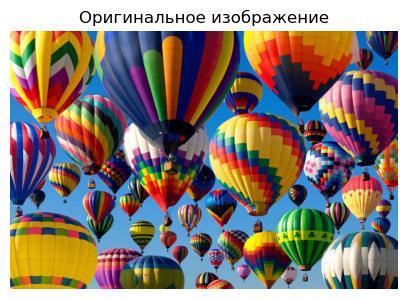

In [5]:

img = cv2.imread('/Users/sofagusina/Desktop/программирование/machine_learning/machine_learning/ML/Работа с признаками/Кластеризация/21d1f90d21cd14d487a16ab75f865a89.png')
draw_picture(img, 'Оригинальное изображение', bgr=True)

In [6]:
img

array([[[113, 252, 255],
        [106, 254, 254],
        [100, 255, 253],
        ...,
        [ 80,   7,   0],
        [ 57,   9,   3],
        [ 36,  11,  21]],

       [[110, 250, 251],
        [108, 254, 254],
        [103, 255, 255],
        ...,
        [ 81,   7,   0],
        [ 58,  10,   6],
        [ 37,  11,  25]],

       [[106, 249, 247],
        [110, 254, 255],
        [112, 255, 255],
        ...,
        [ 82,   7,   0],
        [ 59,   9,  11],
        [ 38,   9,  32]],

       ...,

       [[105, 225, 255],
        [ 84, 226, 255],
        [ 50, 223, 255],
        ...,
        [ 12,   0,   0],
        [ 11,   0,   0],
        [ 11,   0,   0]],

       [[ 48, 214, 245],
        [ 63, 224, 255],
        [ 70, 226, 255],
        ...,
        [ 16,   1,   0],
        [ 18,   0,   0],
        [ 18,   0,   0]],

       [[ 46, 212, 243],
        [ 61, 222, 254],
        [ 69, 225, 255],
        ...,
        [ 16,   1,   0],
        [ 18,   0,   0],
        [ 18,   0,   0]]

In [7]:
h, w, rgb = img.shape

In [8]:
pixels = img.reshape(-1, 3) ## оставляем для работы только пиксели, умножая длину на ширину картинки

Обучение моделей кластеризации

KMeans модель

In [9]:
def display_components_in_2D_space(components_df, n, b, a, epsilent, labels=None): ## на вход подается датафрейм с сжатыми компонентами и лейблы
    components_with_labels_df = pd.concat([components_df, pd.DataFrame(labels)], axis=1)

    figsize = (a, b)
    if labels is not None:
        components_with_labels_df.plot(kind='scatter', x='component_1', y='component_2', ## отрисовываем компоненты и разукрашиваем в зависимсоти от лейбла
                                         c=components_with_labels_df.iloc[:, -1], cmap=plt.get_cmap('jet'),
                                         alpha=0.5, figsize=figsize)
    else:
        components_with_labels_df.plot(kind='scatter', x='component_1', y='component_2', alpha=0.5, figsize=figsize) ## если лейблы не передаем, то обычный график без разукрашивания

    plt.xlabel('component_1')
    plt.ylabel('component_2')
    if n != None:
        plt.title(f'2D mapping of objects, number of klaster = {n}')
    if epsilent != None:
        plt.title(f'2D mapping of objects, epsilent = {epsilent}')
    plt.show()

In [10]:
from sklearn.decomposition import PCA ## определяем количество кластеров через PCA - сжимаем данные до 2
pca = PCA(n_components=2)
pixel_reduced = pca.fit_transform(pixels)
components_df = pd.DataFrame(pixel_reduced, columns=['component_1', 'component_2'])

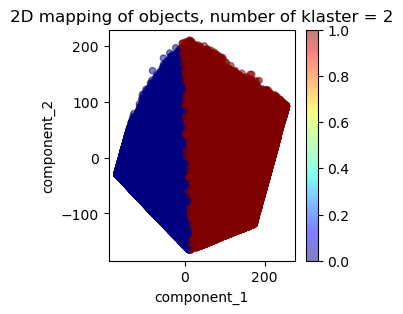

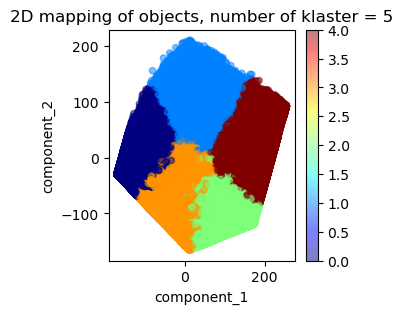

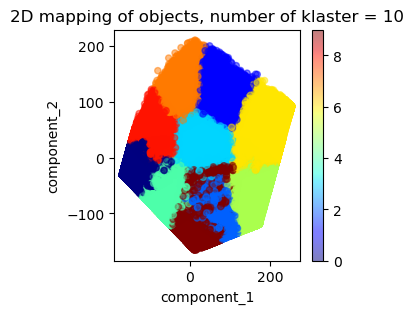

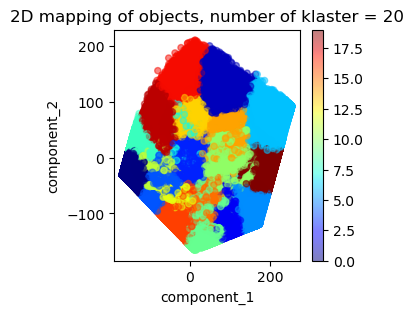

In [11]:


clasters = [2,5,10,20]
label_clast_dict = {}
for n in clasters:
    kmeans = KMeans(n_clusters=n, random_state=42) ## фиксируемм случайность,потому что первая центроида случвйно выбирается
    labels_clast = kmeans.fit_predict(pixels)
    label_clast_dict[n] = labels_clast
    centroid = kmeans.cluster_centers_.astype('uint8')
    display_components_in_2D_space(components_df,n, a=3, b=3, labels=labels_clast, epsilent=None)


Более четкое разбиение на кластеры демонстрируем алгоритм с количеством кластеров, равном 10.

Визуализация сжатых изображений

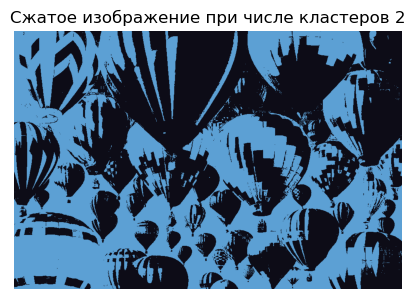

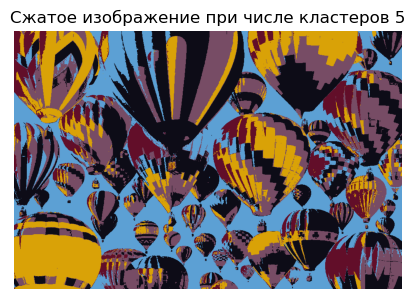

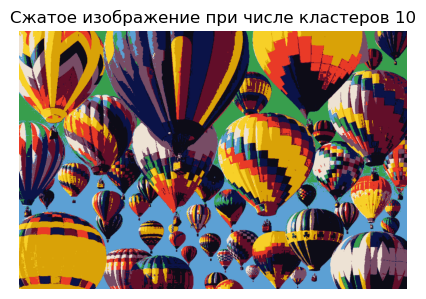

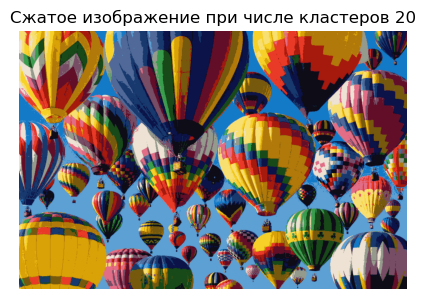

In [12]:
for claster,label in label_clast_dict.items():
    compress_color = centroid[label] ## фиксируем цвет каждого центроида (rgb)
    compress_img = compress_color.reshape((h, w, 3)) ## переделываем массив с центроидами в массив с характеристиками пикселей исходного изображения 
    draw_picture(compress_img, title=f'Сжатое изображение при числе кластеров {claster}', bgr=True)



Кластеризация с помощью алгоритма DBSCAN

In [13]:
def visual_img(labels,epsilent):
    df = pd.DataFrame(pixels, columns=['R', 'G', 'B'])
    df['label'] = labels
    cluster_colors = (
                df[df['label'] != -1].groupby('label')[['R', 'G', 'B']].mean().astype('uint8') # устанавливаем средний цвет по кластеру
        )

    noise_color = np.array([0, 0, 0], dtype='uint8') ## устанавливаем цвет шума - черный (шум, если кластер - 1)
    mapped_pixels = []
    for i, label in enumerate(labels):
        if label == -1:
            mapped_pixels.append(noise_color)
        else:
            mapped_pixels.append(cluster_colors.loc[label].values)

    mapped_pixels = np.array(mapped_pixels, dtype='uint8')
    compress_img_DBScan = mapped_pixels.reshape((h, w, 3)) ## создаем цветовую палитру для изображения
    draw_picture(compress_img_DBScan, title=f'Сжатое изображение при диаметре кластера epsilent {epsilent}', bgr=True)

In [14]:
eps_list = [0.1,0.5,1.5,3] 
labels_list = {}
def DBScan_claster(epsilent):
    for eps in epsilent:
        dbscan = DBSCAN(eps=eps, min_samples=1)
        labels_clast_DBScan = dbscan.fit_predict(pixels)
        labels_clast_DBScan = pd.Series(labels_clast_DBScan)
        labels_list[eps] = labels_clast_DBScan

        display_components_in_2D_space(components_df, a=3, b=3,labels=labels_clast_DBScan, n= None,epsilent=eps)
        visual_img(labels_clast_DBScan,eps)


        

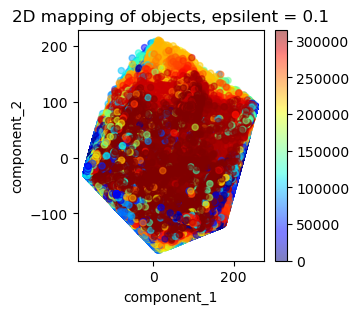

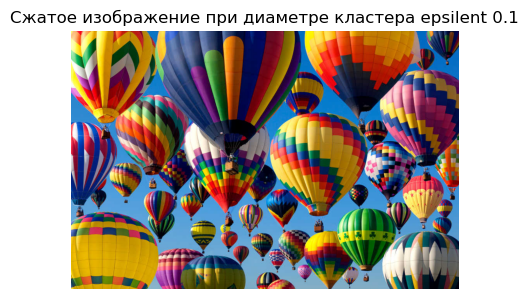

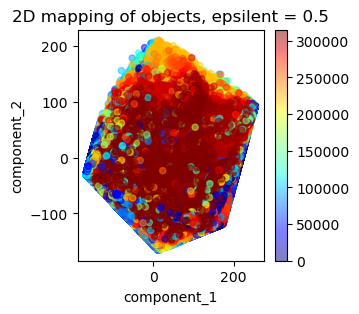

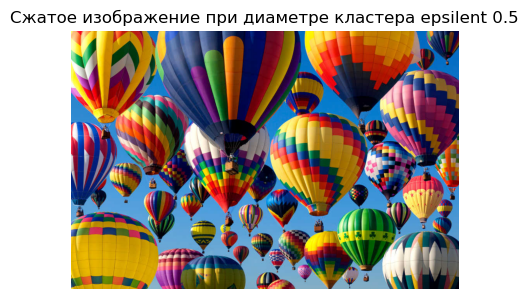

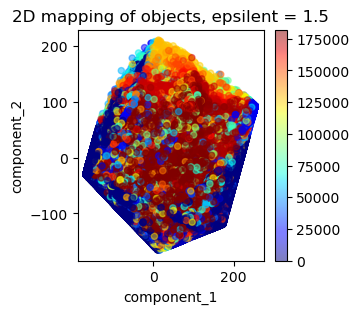

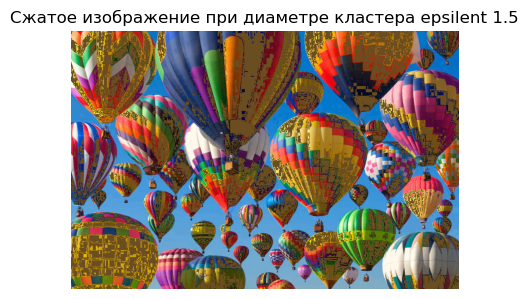

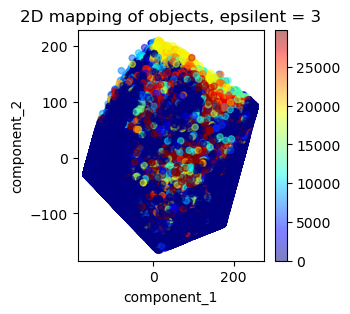

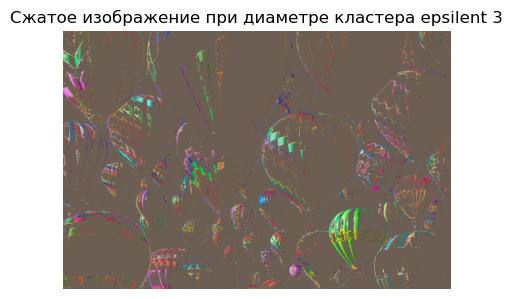

In [15]:
DBScan_claster(eps_list)

Можно сделать вывод, что, чем больше диаметр окружности кластера, тем сильнее сжимается изображение. Это объясняется тем, что много точек попадают как шумовые данные и изображение теряет пиксели

Кластеризация с помощью алгоритма AgglomerativeClustering. Рассмотрите число кластеров K = 2, 5, 10, 20.

Код невозможно выполнить, потому что ядро завершается с ошибкой "}
11:02:35.519 [error] Disposing session as kernel process died ExitCode: undefined, Reason: "

Вывод: было проведена кластеризация пикселей для того, чтобы сжать цветное изображение (уменьшить количество разных цветов на нем). Кластеризация выполнялась при помощи алгоритмов KMeans и DBScan, алгоритм кластеризации AgglomerativeClustering не удалось воспроизвести, так как ядро аварийно завершало работу. 